# EXPLORATORY DATA ANALYSIS (I.)

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

In [2]:
KEYS = [
    'entity_id',
    'financial_report_id',
    'financial_statement_id',
    'entity_ico',
    'entity_name']

DIMENSIONS = [
    'year',
    # 'month',
    # 'financial_report_order_number',
    'period_length',
    # 'consolidated',
    # 'approved_date',
    'type',
    'financial_report_template_id',
    # 'establishment_date',
    # 'cancellation_date',
    # 'sknace_code',
    # 'entity_state',
    'legal_form_code',
    'org_size_code',
    'ownership_category_code',
    'entity_consolidated',
    # 'sknace_division_name',
    'sknace_division',
    # 'sknace_subcategory',
    'sal_class',
    'is_outlier']

RAW_VALUES = [ 
    'total_assets',
    'non_current_assets',
    'non_current_intangible_assets',
    'non_current_tangible_assets',
    'non_current_financial_assets',
    'current_assets',
    'inventories',
    'non_current_receivables',
    'current_receivables',
    'financial_assets',
    'current_financial_assets',
    'cash_and_bank_balances',
    'total_equity_and_liabilities',
    'equity',
    'share_capital',
    'share_premium',
    'net_profit_of_previous_years',
    'net_profit_after_tax',
    'liabilities',
    'non_current_liabilities',
    'long_term_provisions',
    'long_term_bank_loans',
    'current_liabilities',
    'short_term_provisions',
    'current_bank_loans',
    'short_term_financial_assistance',
    'operating_revenues',
    'sales_from_the_merchandise',
    'sales_from_the_own_products_and_services',
    'sales_from_the_other',
    'other_revenues_from_operating_activities',
    'operating_costs',
    'costs_of_merchandise_sold',
    'consumed_materials_energy_non_inventory_supplies',
    'services',
    'personnel_costs',
    'taxes_and_fees',
    'depreciation',
    'remaining_cost_of_sold_long_term_assets_and_materials',
    'adjustments_to_receivables',
    'other_costs_of_operating_activities',
    'operating_result',
    'value_added',
    'revenues_from_financial_activities',
    'cost_of_financial_activities',
    'result_from_fincancial_activities',
    'result_before_tax',
    'income_tax',
    'result_after_tax']

PRIMARY_VALUES = [
    'CA',
    'CASH',
    'CL',
    'EQ',
    'NCL',
    'TA',
    'TL',
    'CC',
    'INV',
    'CF_NETTO',
    'CF_SELFFIN',
    'EAT',
    'EBIT',
    'SAL',
    'COST',
    'INT',
    'YIE',
    'LABOR']

RATIOS = [
    'L3',
    'L2',
    'L1',
    'CF_CL',
    'CASH_TA',
    'SAL_TA',
    'TL_SAL',
    'INV_COST',
    'INV_SAL',
    'CC_SAL',
    'TA_SAL',
    'TL_TA',
    'CF_TL',
    'CL_TA',
    'NCL_TA',
    'EQ_TL',
    'EQ_TA',
    'CL_CC',
    'ROE',
    'EAT_TA',
    'ROA_BRUTTO',
    'CF_TA',
    'CF_SAL',
    'ROS',
    'EAT_YIE',
    'ROI',
    'ROA_NETTO',
    'LABOR_PRODUCTIVITY']

DISTRESS_SIGNALS = [
    'DPHZ_vat_registration_cancelled',
    'DPHZ_vat_registration_cancelled_1y_off',
    'DPHZ_vat_registration_cancelled_2y_off',
    'DPHZ_vat_registration_cancelled_3y_off',
    'RU_event',
    'RU_event_1y_off',
    'RU_event_2y_off',
    'RU_event_3y_off',
    'cancellation_year',
    'RUZ_cancelled',
    'RUZ_cancelled_1y_off',
    'RUZ_cancelled_2y_off',
    'RUZ_cancelled_3y_off']

In [3]:
data_raw = pd.read_csv('../../DATA/FINAL/super_sample.csv')
data_raw

,entity_id,year,month,financial_report_id,financial_report_template_id,CA,CASH,CL,EQ,NCL,TA,TL,CC,INV,CF_NETTO,CF_SELFFIN,EAT,EBIT,SAL,COST,INT,YIE,LABOR,L3,L2,L1,CF_CL,CASH_TA,SAL_TA,TL_SAL,INV_COST,INV_SAL,CC_SAL,TA_SAL,TL_TA,CF_TL,CL_TA,NCL_TA,EQ_TL,EQ_TA,EBIT_INT,CL_CC,ROE,EAT_TA,ROA_BRUTTO,CF_TA,CF_SAL,ROS,EAT_YIE,ROI,ROA_NETTO,LABOR_PRODUCTIVITY,financial_statement_id,financial_report_order_number,entity_ico,period_length,consolidated,approved_date,type,entity_name,establishment_date,cancellation_date,sknace_code,entity_state,legal_form_code,org_size_code,ownership_category_code,entity_consolidated,sknace_division_name,sknace_division,sknace_subcategory,DPHZ_vat_registration_cancelled,DPHZ_vat_registration_cancelled_1y_off,DPHZ_vat_registration_cancelled_2y_off,DPHZ_vat_registration_cancelled_3y_off,RU_event,RU_event_1y_off,RU_event_2y_off,RU_event_3y_off,cancellation_year,RUZ_cancelled,RUZ_cancelled_1y_off,RUZ_cancelled_2y_off,RUZ_cancelled_3y_off,sal_class,is_outlier,RUZ_indirect_criteria,RUZ_indirect_criteria_1y_off,RUZ_indirect_criteria_2y_off,RUZ_indirect_criteria_3y_off,combined_issue_criteria_1y_off,combined_issue_criteria_2y_off,combined_issue_criteria_3y_off,plausible_sample
0,27971.0,2017.0,1.0,6322368,699.0,992069.0,244824.0,747985.0,14724.0,25063.0,1014018.0,999294.0,732533.0,11351.0,-69288.0,-72168.0,-76727.0,-73847.0,3818727.0,3859116.0,19980.0,3818774.0,337135.0,1.326322,1.306653,0.327311,-0.092633,0.241440,3.765936,0.261682,1.058885,1.070084,0.191826,95.593762,0.985480,-0.069337,0.737645,0.024717,0.014734,0.014520,-2.696046,1.021094,-5.211016,-0.075666,-0.072826,-0.068330,-0.018144,-0.020092,-0.020092,-0.055963,-0.075666,0.088285,3722506.0,1.0,652423.0,12.0,NaN,2018-06-27,Riadna,KUHO - mix. spol. s r.o.,1991-06-25,NaN,49410.0,NaN,112.0,2.0,2.0,False,Pozemná doprava a doprava potrubím,H,49.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,0,0,0,0,2. Malý,False,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,71752.0,2015.0,1.0,5058691,699.0,912862.0,2213.0,48840.0,2399.0,18406.0,948368.0,945969.0,910649.0,0.0,-35846.0,-38726.0,-57122.0,-54242.0,2134583.0,2202672.0,67110.0,2179262.0,12114.0,18.690868,18.690868,0.045311,-0.733948,0.002333,2.250796,0.443163,0.000000,0.000000,0.426617,159.943408,0.997470,-0.037893,0.051499,0.019408,0.002536,0.002530,0.191745,0.053632,-23.810754,-0.060232,-0.057195,-0.037798,-0.016793,-0.026760,-0.026212,0.010532,-0.060232,0.005675,2703097.0,1.0,36584649.0,12.0,NaN,2016-03-10,Riadna,FeCom s.r.o.,2004-10-08,NaN,46720.0,NaN,112.0,0.0,8.0,False,"Veľkoobchod, okrem motorových vozidiel a motoc...",G,46.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,0,0,0,0,2. Malý,True,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,72912.0,2017.0,1.0,6351388,699.0,1481047.0,1630.0,1326396.0,-718007.0,549510.0,1521883.0,2239890.0,1417869.0,61548.0,47298.0,44418.0,10312.0,13192.0,4512342.0,4460274.0,32121.0,4512573.0,692228.0,1.116595,1.070192,0.001229,0.035659,0.001071,2.964973,0.496392,4.967695,4.910372,0.314220,121.417632,1.471789,0.021116,0.871549,0.361072,-0.320555,-0.471789,1.410697,0.935486,-0.014362,0.006776,0.008668,0.031079,0.010482,0.002285,0.002285,0.027882,0.006776,0.153408,3748560.0,1.0,35904798.0,12.0,NaN,2018-06-21,Riadna,"WETRON, s.r.o.",2004-10-23,NaN,33200.0,NaN,112.0,0.0,8.0,False,Oprava a inštalácia strojov a prístrojov,C,33.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,0,0,0,0,2. Malý,False,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,74296.0,2016.0,1.0,5844975,699.0,514344.0,10817.0,477398.0,-100409.0,0.0,1660755.0,1761164.0,410644.0,92883.0,66009.0,-141558.0,-344270.0,-341390.0,4362628.0,4667711.0,34421.0,4362628.0,501993.0,1.077390,0.882829,0.022658,0.138268,0.006513,2.626894,0.403693,7.163657,7.664619,0.094128,137.043956,1.060460,0.037480,0.287458,0.000000,-0.057013,-0.060460,-8.918073,1.162559,3.428677,-0.207297,-0.205563,0.039746,0.015131,-0.078913,-0.078913,-0.186571,-0.207297,0.115067,3338450.0,2.0,36561380.0,12.0,NaN,2017-07-28,Riadna,Hoeckle s.r.o.,2004-06-25,NaN,25620.0,NaN,112.0,0.0,7.0,False,Výroba kovových konštrukcií okrem strojov 

## 1. Struktura udajov z pohladu velkostnej kategorie, oblasti zamerania etc.

In [4]:
data = data_raw.query('financial_report_template_id == 699')

In [5]:
display(data.shape)

(8664, 94)

In [6]:
def get_sample_sizes(data, row_label, column_label):
    samples_df = data.groupby([row_label, column_label])['financial_statement_id'].nunique().to_frame('count').reset_index()
    wide_df = pd.pivot_table(samples_df, index = row_label, columns=column_label, fill_value=0).reset_index()
    return wide_df

In [7]:
get_sample_sizes(data, 'year', 'combined_issue_criteria_3y_off')

year count     
combined_issue_criteria_3y_off           0.0  1.0
0                               2015.0  1889  464
1                               2016.0  1736  256
2                               2017.0  1752  182
3                               2018.0  2116  269

In [15]:
get_sample_sizes(data, 'year', 'RUZ_indirect_criteria_3y_off')

year count     
RUZ_indirect_criteria_3y_off           0.0  1.0
0                             2015.0  2159  194
1                             2016.0  1851  141
2                             2017.0  1813  121
3                             2018.0  2220  165

In [14]:
data.query('cancellation_year == 2017').drop_duplicates('entity_id')[['entity_id', 'entity_ico']]

,entity_id,entity_ico
51,245778.0,35844639.0
233,60701.0,36499552.0
235,64509.0,35903384.0
236,64850.0,36496839.0
241,74050.0,35834064.0
...,...,...
750,1226550.0,46866108.0
751,1226609.0,46775684.0
753,1228897.0,46860061.0
754,1229133.0,46873911.0


In [8]:
get_sample_sizes(data, 'sal_class', 'combined_issue_criteria_3y_off')

sal_class count     
combined_issue_criteria_3y_off               0.0  1.0
0                                  2. Malý  6094  964
1                               3. Stredný  1399  207

In [9]:
get_sample_sizes(data, 'sknace_division', 'combined_issue_criteria_3y_off')

sknace_division count     
combined_issue_criteria_3y_off                   0.0  1.0
0                                            A   254   23
1                                            C  1676  194
2                                            F   724  111
3                                            G  2553  392
4                                            H   538   84
5                                            I    97   31
6                                            J   283   32
7                                            L   350   73
8                                            M   546  135
9                                            N   372   80
10                                           Q   100   16

## 2. Analýza multikolinearity

In [10]:
RATIOS2 = [
 'SAL_TA',
 'L3',
 'ROE',
 'EAT_TA',
 'TL_TA',
 'CASH_TA',
 'CF_TL',
 'CL_TA',
 'CF_SAL',
 'ROS',
 'NCL_TA',
 'CF_CL',
 'TL_SAL']

In [22]:
Q = data.query(' is_outlier == False and combined_issue_criteria_3y_off == 1').shape[0]
subset = pd.concat(
    [
        data.query('is_outlier == False and combined_issue_criteria_3y_off == 1').sample(Q),
        data.query('is_outlier == False and combined_issue_criteria_3y_off == 0').sample(Q)
    ], axis = 0
)

In [23]:
for col in RATIOS2:
    mean_value = subset[col].mean()
    subset[col] = subset[col].fillna(mean_value)

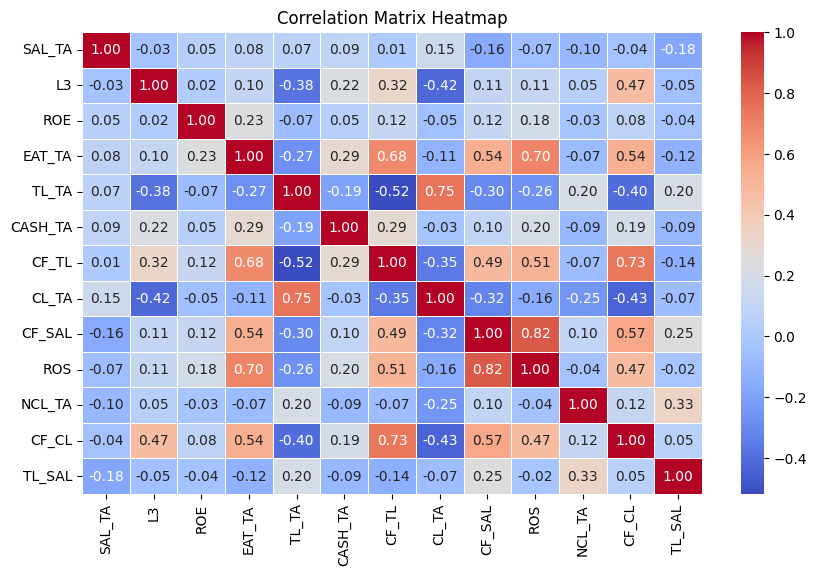

In [24]:
# Calculate the correlation matrix
correlation_matrix = subset[RATIOS2].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [15]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df = subset[RATIOS2].copy()

# Adding a constant for the intercept
df_const = add_constant(df)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['feature'] = df_const.columns
vif_data['VIF'] = [variance_inflation_factor(df_const.values, i) for i in range(df_const.shape[1])]

display(vif_data)

,feature,VIF
0,const,17.162077
1,SAL_TA,1.083118
2,L3,1.430107
3,ROE,1.073463
4,EAT_TA,3.261877
5,TL_TA,4.856095
6,CASH_TA,1.155550
7,CF_TL,3.743334
8,CL_TA,4.720603
9,CF_SAL,6.955087


In [16]:
RATIOS_SUBSET = [
 'SAL_TA',
 'L3',
 'ROE',
 'EAT_TA',
 'TL_TA',
 'CASH_TA',
 'ROS',
 'NCL_TA',
 'TL_SAL']

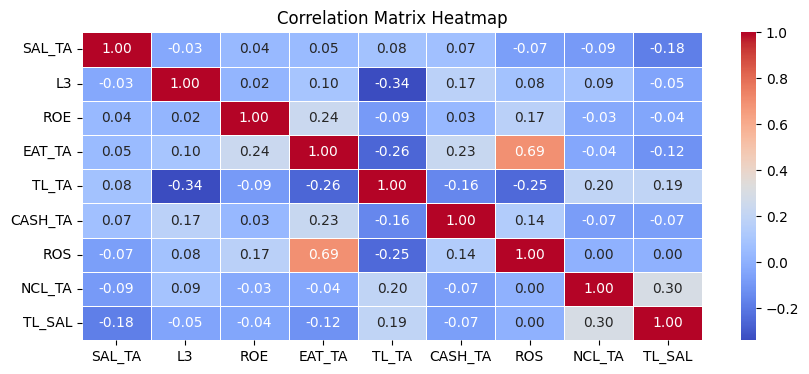

In [17]:
# Calculate the correlation matrix
correlation_matrix = subset[RATIOS_SUBSET].corr()

# Create a heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [18]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df = subset[RATIOS_SUBSET].copy()

# Adding a constant for the intercept
df_const = add_constant(df)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['feature'] = df_const.columns
vif_data['VIF'] = [variance_inflation_factor(df_const.values, i) for i in range(df_const.shape[1])]

display(vif_data)

,feature,VIF
0,const,12.543393
1,SAL_TA,1.074204
2,L3,1.189288
3,ROE,1.061959
4,EAT_TA,2.126293
5,TL_TA,1.330730
6,CASH_TA,1.096432
7,ROS,2.009239
8,NCL_TA,1.166589
9,TL_SAL,1.176648


# 3. Overenie diskriminacnej schopnosti

In [19]:
import pandas as pd
from scipy.stats import ttest_ind, levene

# Load your dataset
# df = pd.read_csv('path_to_your_data.csv')  # Uncomment and modify this line to load your dataset

# Sample data and class division for demonstration
df = pd.DataFrame(subset[RATIOS_SUBSET + ['combined_issue_criteria_3y_off']])

# Separate the dataset into two classes
class0 = df[df['combined_issue_criteria_3y_off'] == 0]
class1 = df[df['combined_issue_criteria_3y_off'] == 1]

# Perform a t-test and Levene's test for each feature
results = []
for feature in df.columns[:-1]:  # Exclude the class label column
    # Levene's test for equality of variances
    stat, p_val_levene = levene(class0[feature], class1[feature])
    
    # Decide which t-test to use based on Levene's test result
    equal_var = p_val_levene > 0.05  # Assume equal variances if Levene's test is not significant
    t_stat, p_val_ttest = ttest_ind(class0[feature], class1[feature], equal_var=equal_var)

    equal_mean = p_val_ttest > 0.05
    
    results.append({
        'Feature': feature,
        'Levene Statistic': stat,
        'Levene P-value': p_val_levene,
        'T-statistic': t_stat,
        'T-test P-value': p_val_ttest,
        'Equal Variances Assumed': equal_var,
        'Equal Mean': equal_mean
    })

results_df = pd.DataFrame(results)
display(results_df)


,Feature,Levene Statistic,Levene P-value,T-statistic,T-test P-value,Equal Variances Assumed,Equal Mean
0,SAL_TA,13.359898,2.663924e-04,-3.774380,1.707015e-04,False,False
1,L3,0.102180,7.492759e-01,1.702622,8.885675e-02,True,True
2,ROE,38.815482,6.118698e-10,3.352728,8.300718e-04,False,False
3,EAT_TA,0.347763,5.554756e-01,7.381290,2.652986e-13,True,False
4,TL_TA,0.003519,9.527048e-01,-16.369024,2.544785e-55,True,False
5,CASH_TA,0.255259,6.134741e-01,0.934114,3.504033e-01,True,True
6,ROS,0.593260,4.412887e-01,7.364873,2.987267e-13,True,False
7,NCL_TA,0.158690,6.904248e-01,-0.210261,8.334937e-01,True,True
8,TL_SAL,7.313265,6.926156e-03,-2.960979,3.122364e-03,False,False


## 4. Zakladne popisne statistiky

In [25]:
subset.query('combined_issue_criteria_3y_off == 1')[RATIOS_SUBSET].describe().T

,count,mean,std,min,25%,50%,75%,max
SAL_TA,893.0,3.628831,6.510581,0.073322,1.451711,2.286631,3.962832,146.299417
L3,893.0,1.771646,3.555344,0.015903,0.941737,1.094946,1.598838,80.047791
ROE,893.0,-0.024507,1.673686,-25.103896,-0.117178,0.071417,0.398383,7.117028
EAT_TA,893.0,0.029368,0.120526,-0.710959,-0.001913,0.011232,0.055236,0.712371
TL_TA,893.0,0.851524,0.279940,0.026637,0.704153,0.890095,0.983690,2.466045
CASH_TA,893.0,0.108881,0.153320,0.000000,0.010591,0.044506,0.142457,1.000000
ROS,893.0,0.010741,0.072357,-0.284867,-0.001016,0.004485,0.020666,1.072717
NCL_TA,893.0,0.070511,0.170248,0.000000,0.000312,0.007255,0.049673,1.656374
TL_SAL,893.0,0.574186,1.073167,0.001863,0.197008,0.342179,0.575957,14.280621
